In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = sns.load_dataset('titanic')

In [2]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.isnull().sum() #결측차 구분

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

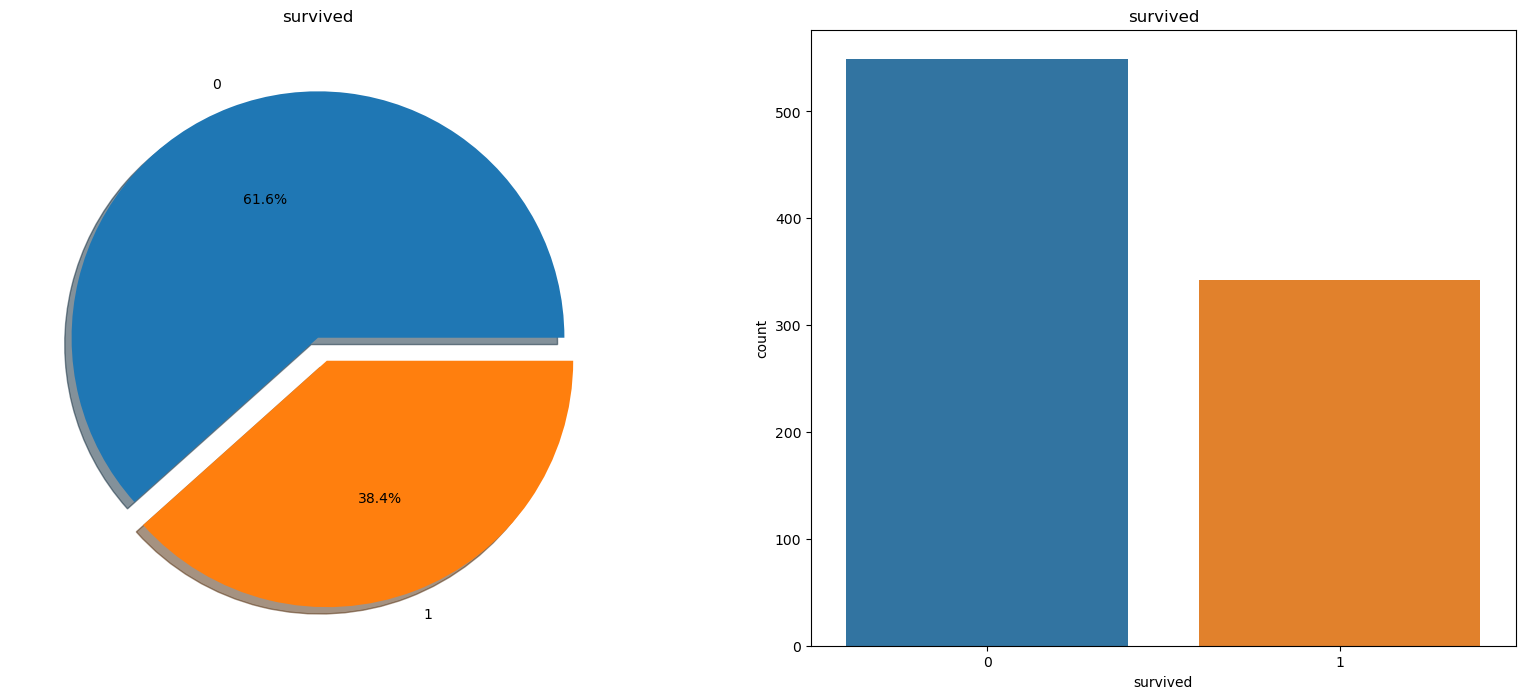

In [14]:
f,ax = plt.subplots(1, 2, figsize=(20, 8))
#survive value 세기, 
data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('survived')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('survived', data=data, ax=ax[1])
ax[1].set_title('survived')
plt.show()

In [17]:
data.groupby(['sex', 'survived'])['survived'].count() #성별별 생존자 확인

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

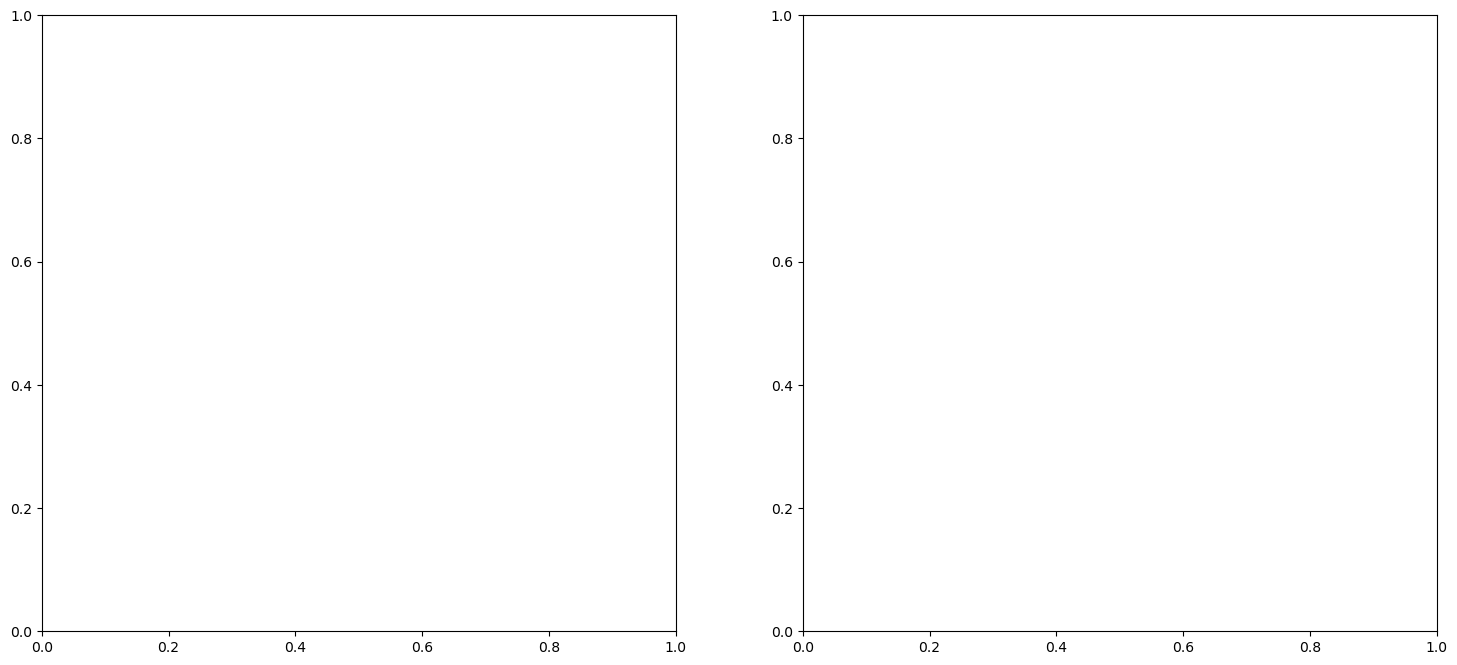

In [18]:
f.ax = plt.subplots(1, 2, figsize=(18, 8))
data[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('sex', hue='survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show

Text(0.5, 1.0, 'Pclass : survived VS Dead')

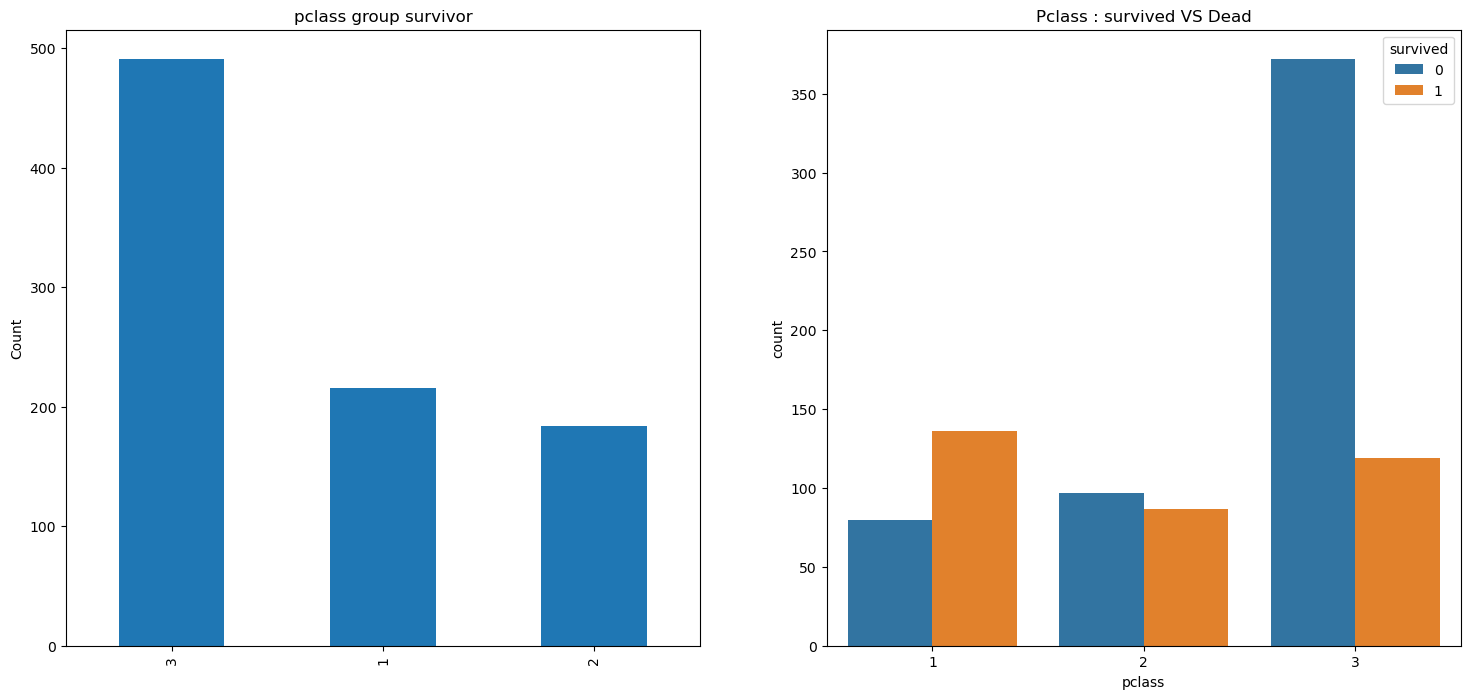

In [22]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
data['pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('pclass group survivor')
ax[0].set_ylabel('Count')
sns.countplot('pclass', hue='survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : survived VS Dead')

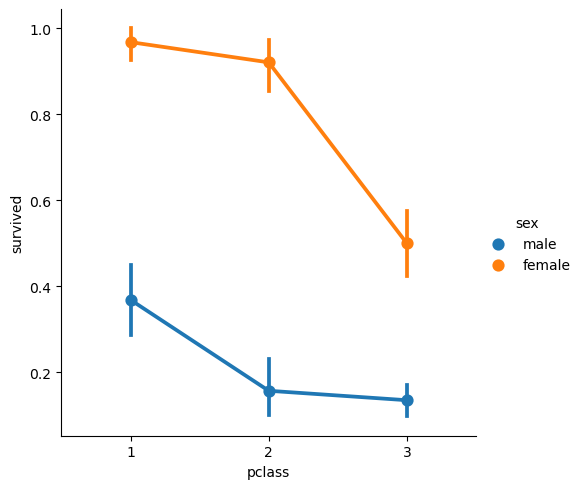

In [23]:
sns.factorplot('pclass','survived', hue='sex', data=data)

In [ ]:
f,ax = sns.subplots(1, 2, figsize=(18, 8))
sns.violinplot('pclass', 'age', hue='survived', data=data, split=True, ax=ax[0])
ax[0].set_title('')

In [26]:
pd.crosstab([data.sibsp],data.survived).style.background_gradient(cmap='summer_r')

survived,0,1
sibsp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


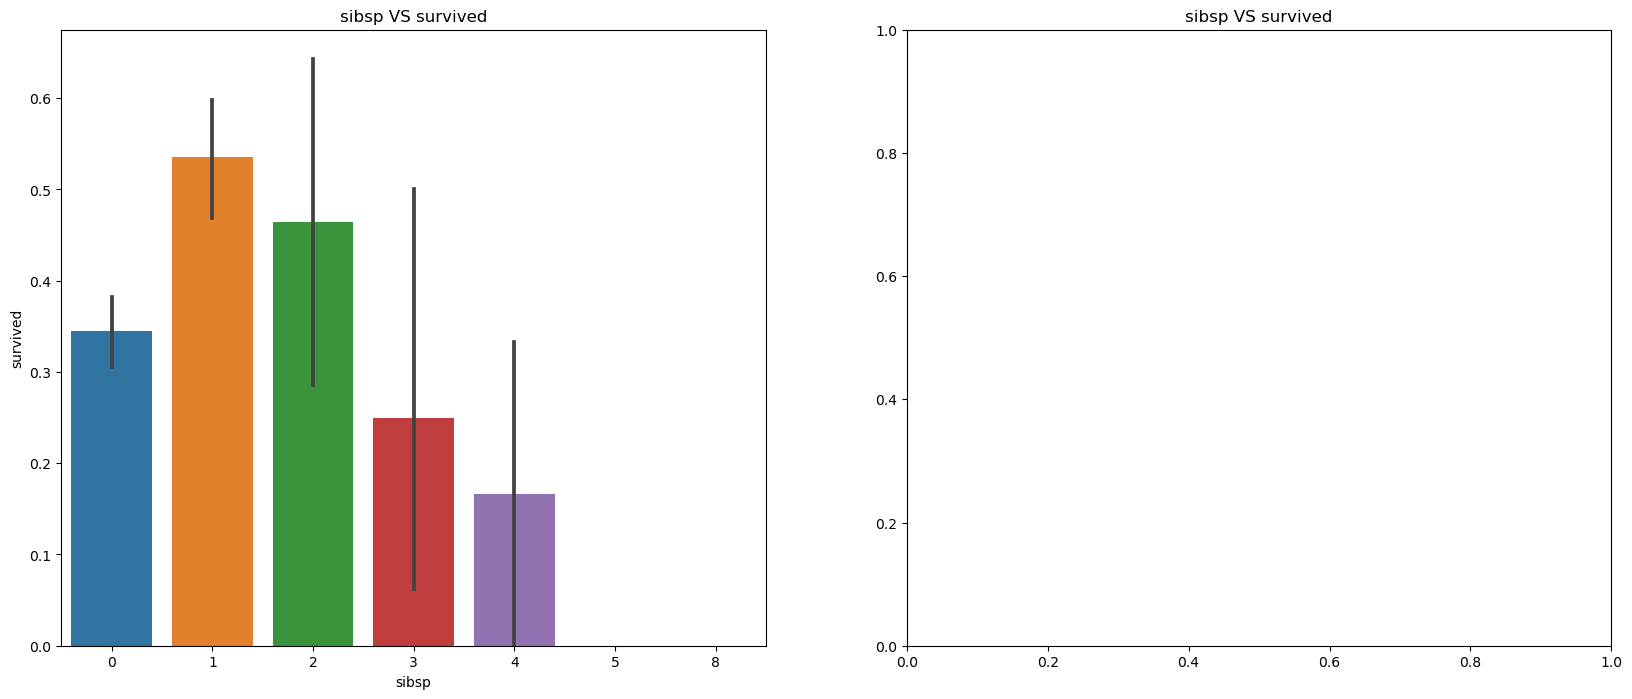

In [30]:
f, ax=plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('sibsp','survived', data=data, ax=ax[0])
ax[0].set_title('sibsp VS survived')
sns.factorplot('sibsp','survived', data=data, ax=ax[1])
ax[1].set_title('sibsp VS survived')
plt.close(2)
plt.show()

In [33]:
pd.crosstab(data.parch, data.pclass).style.background_gradient(cmap='summer_r')

pclass,1,2,3
parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


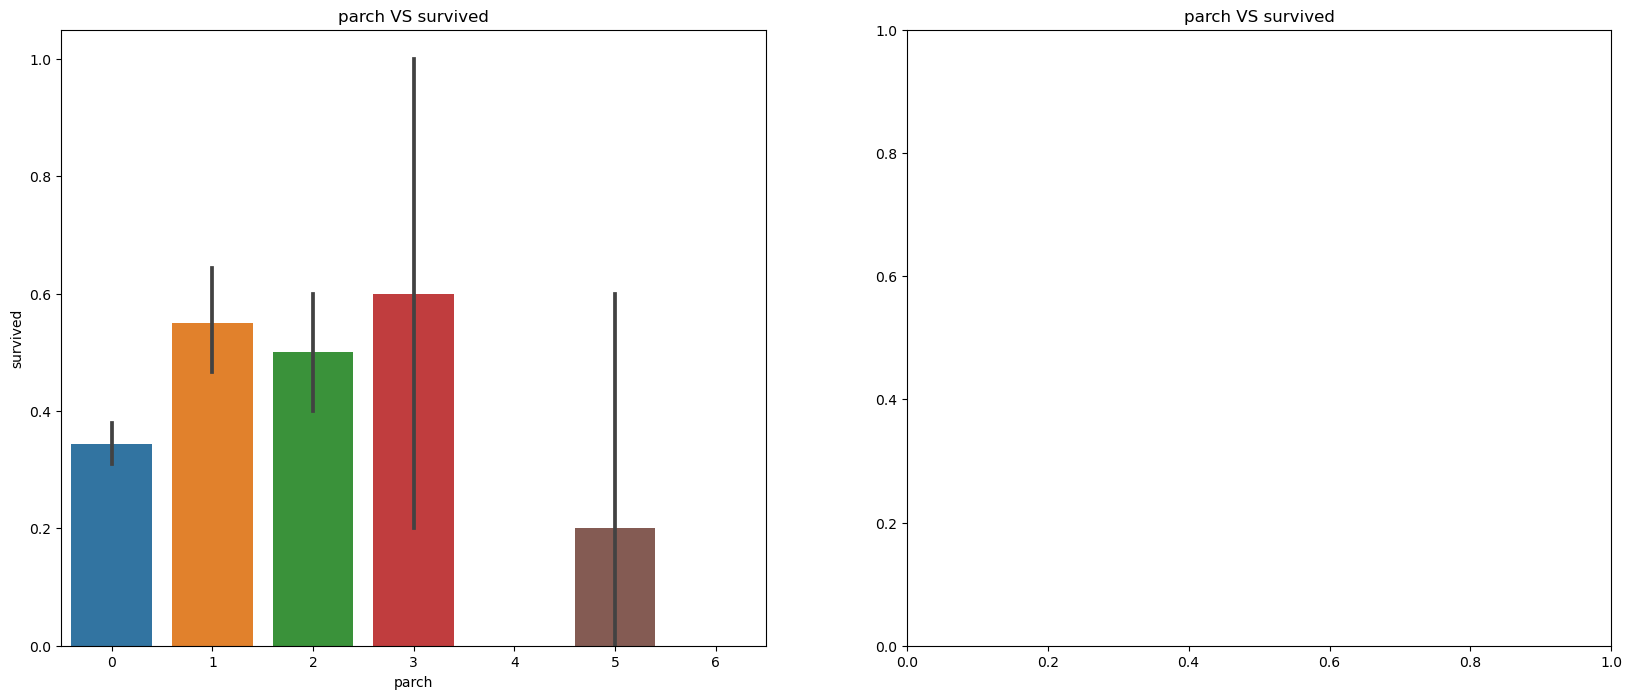

In [34]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('parch', 'survived', data=data, ax=ax[0])
ax[0].set_title('parch VS survived')
sns.factorplot('parch', 'survived', data=data, ax=ax[1])
ax[1].set_title('parch VS survived')
plt.close(2)
plt.show()

In [35]:
print('Highest Fare was : ',data['fare'].max())
print('lowest Fare was : ',data['fare'].min())
print('Average Fare was : ',data['fare'].mean())

Highest Fare was :  512.3292
lowest Fare was :  0.0
Average Fare was :  32.2042079685746


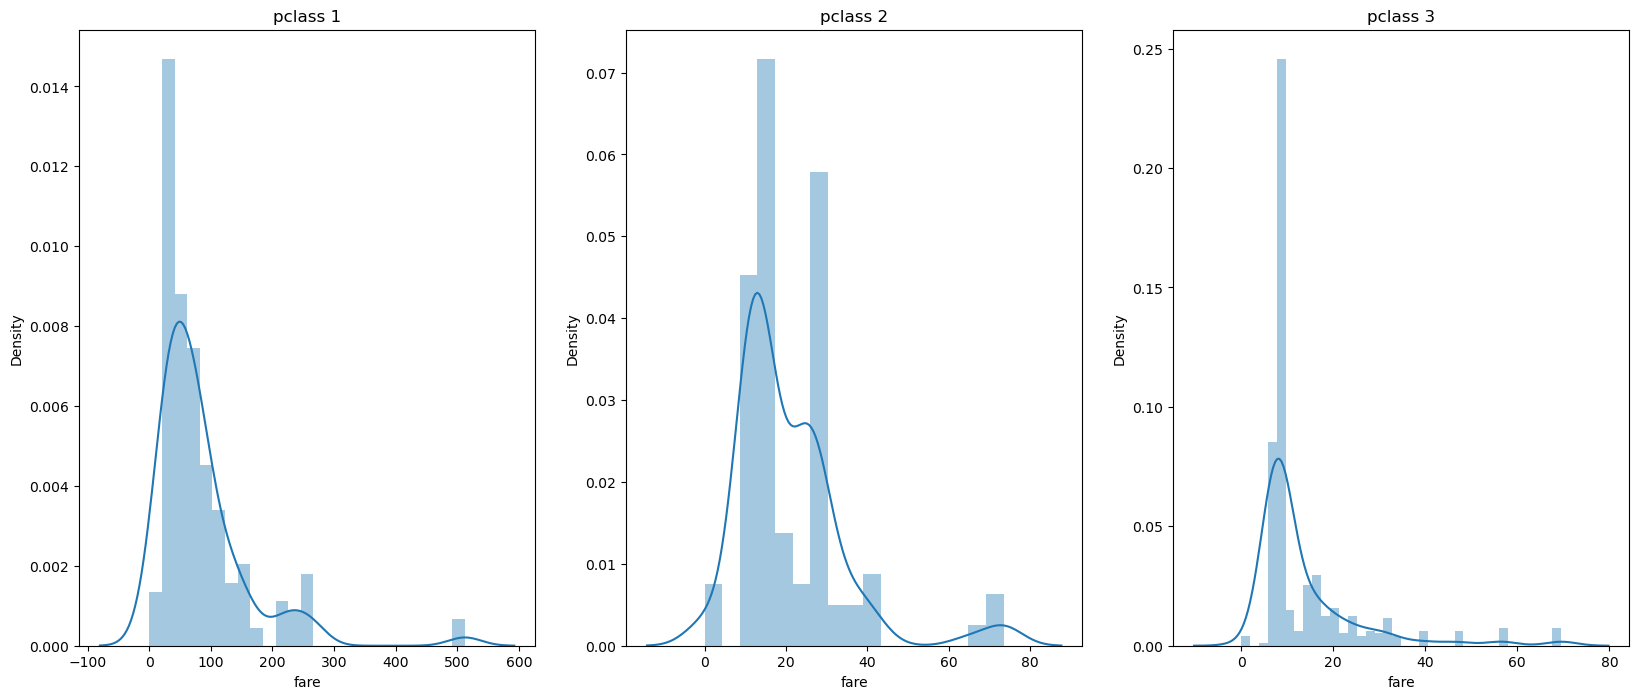

In [37]:
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(data[data['pclass']==1].fare,ax=ax[0])
ax[0].set_title('pclass 1')
sns.distplot(data[data['pclass']==2].fare,ax=ax[1])
ax[1].set_title('pclass 2')
sns.distplot(data[data['pclass']==3].fare,ax=ax[2])
ax[2].set_title('pclass 3')
plt.show()               

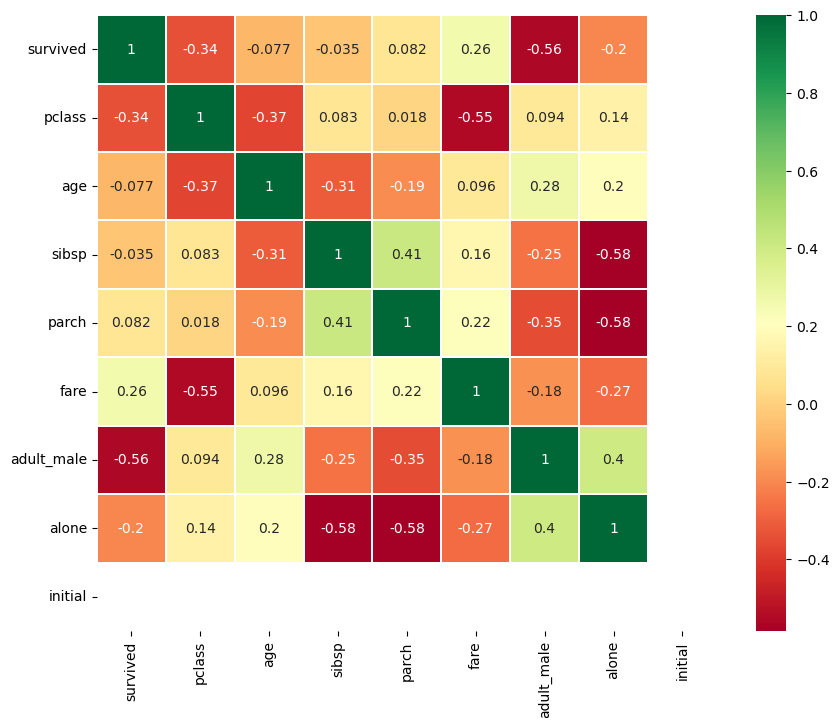

In [38]:
#상관관계
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [45]:
data['age_band'] = 0
data.loc[data['age']<=20, 'age_band'] = 0
data.loc[(data['age'])>20&(data['age']<=40), 'age_band'] = 1
data.loc[(data['age'])>40&(data['age']<=60), 'age_band'] = 2
data.loc[data['age']>60, 'age_band'] = 3
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,initial,age_band
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,2
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,0,2
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0,2
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,0,2
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,0,2


In [46]:
data['age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,age_band
2,692
0,177
3,22


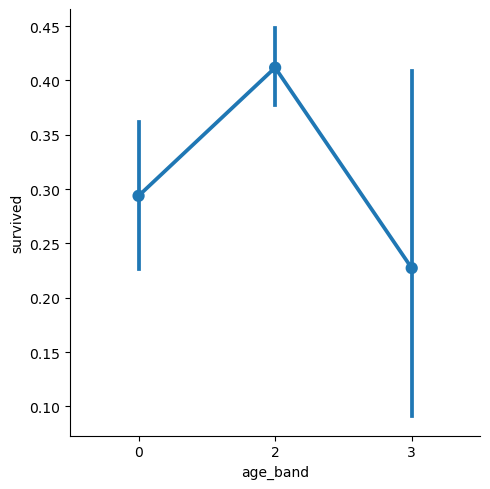

In [47]:
sns.factorplot('age_band','survived',data=data, ax=ax[0])
plt.show()

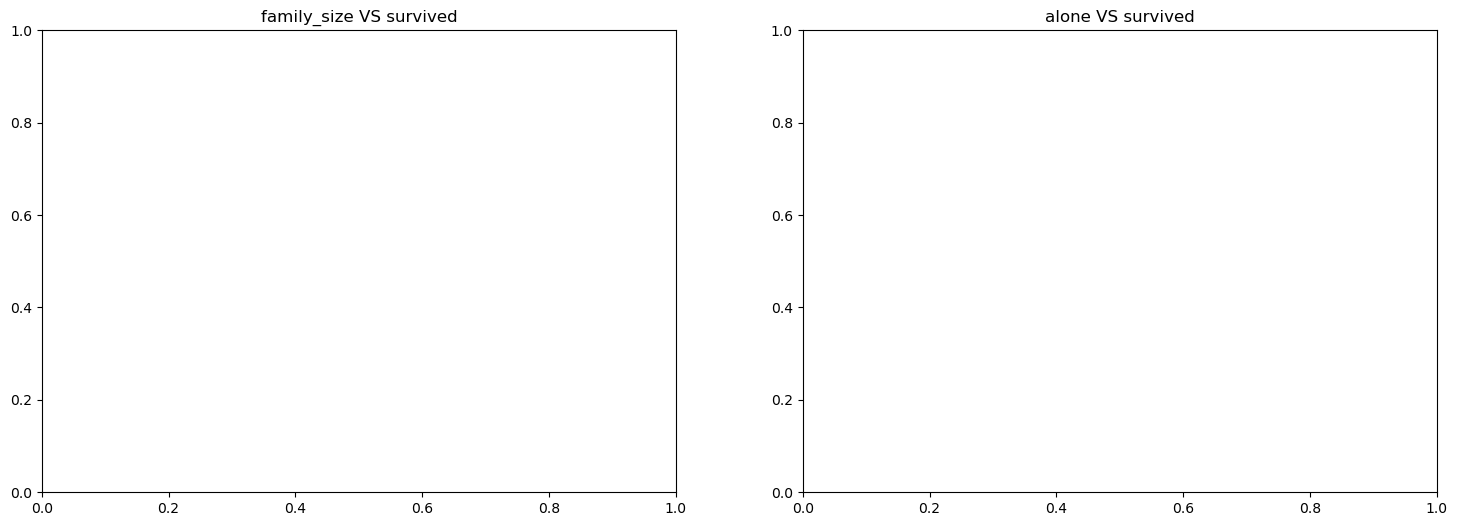

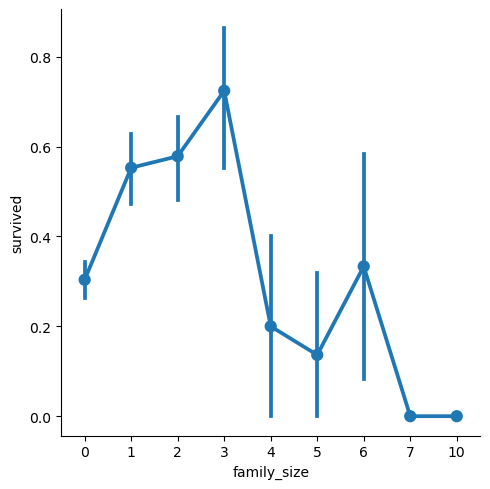

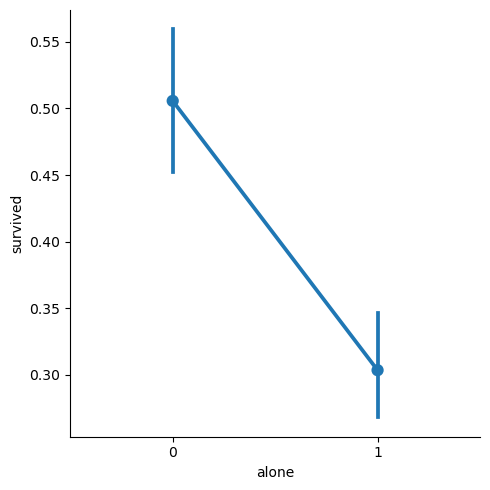

In [54]:
data['family_size'] = 0
data['family_size']=data['parch'] + data['sibsp']
data['alone'] = 0
data.loc[data.family_size==0, 'alone']=1

f, ax=plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('family_size','survived', data=data, ax=ax[0])
ax[0].set_title('family_size VS survived')
sns.factorplot('alone','survived', data=data, ax=ax[1])
ax[1].set_title('alone VS survived')

plt.show()

In [57]:
data['sex'].replace(['male','female'],[0,1], inplace=True)
data['embarked'].replace(['S','O','C'],[0, 1, 2],inplace=True)
data['initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [ ]:
data.drop(['name','age','ticket','fare','cabin','fare_range','passengerid'],axis=1,inplace=True)